# Prac 02
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 20]

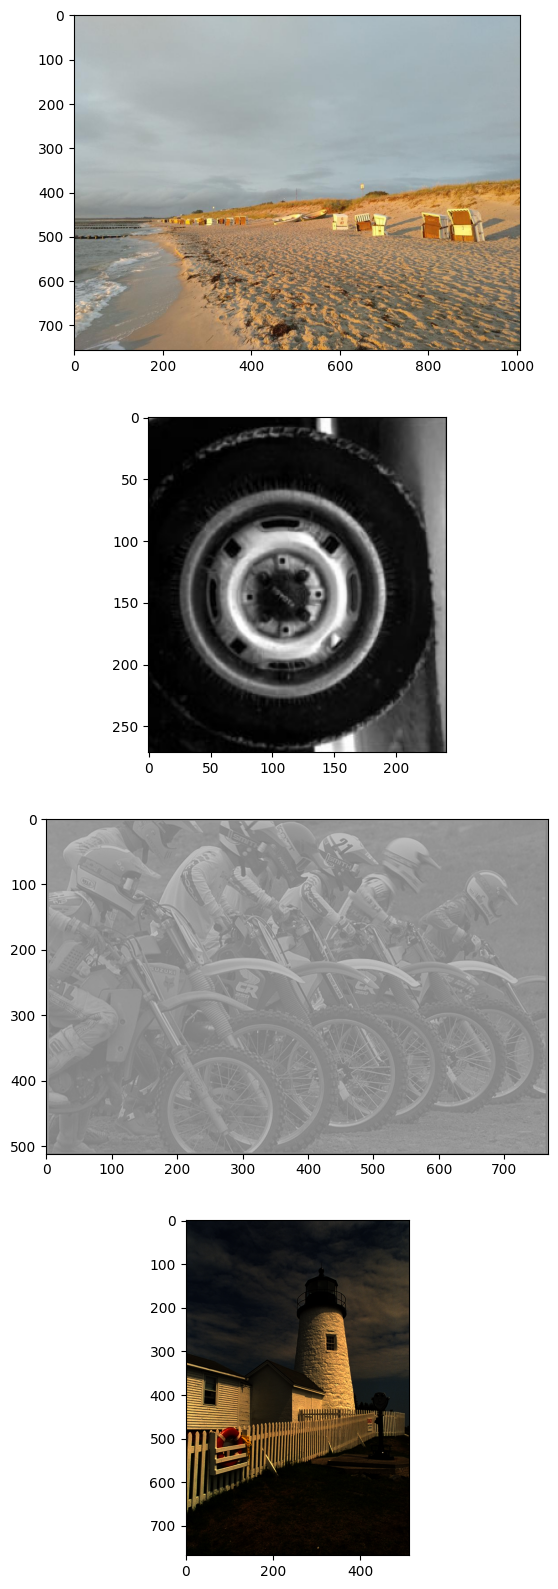

In [84]:
images = []

images.append(cv2.cvtColor(cv2.imread('sea.jpg'), cv2.COLOR_BGR2RGB))
images.append(cv2.cvtColor(cv2.imread('tire.png'), cv2.COLOR_BGR2RGB))
images.append(cv2.cvtColor(cv2.imread('kodim05.jpg'), cv2.COLOR_BGR2RGB))
images.append(cv2.cvtColor(cv2.imread('dark.png'), cv2.COLOR_BGR2RGB))
for i in range(len(images)):
    plt.subplot(len(images)*100+10+i+1), plt.imshow(images[i])

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

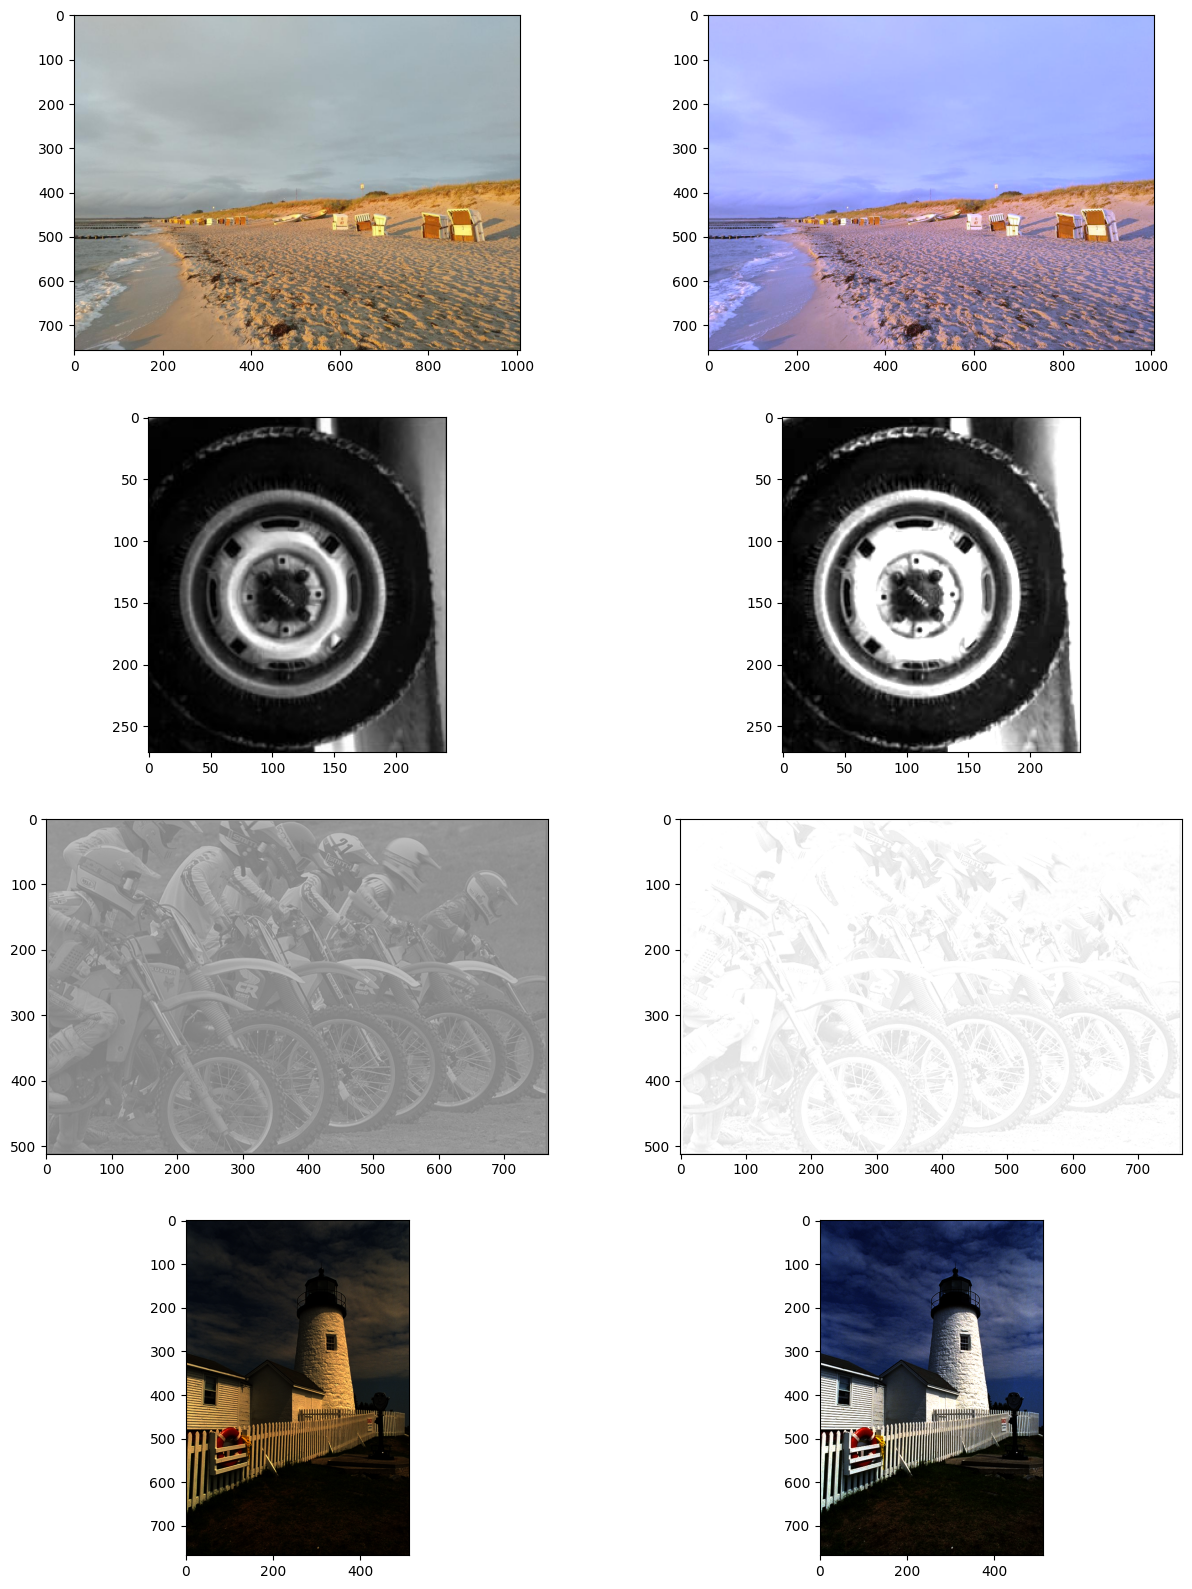

In [85]:
# Define white patch and the coefficients
row, col = [455, 91, 34, 412], [687, 91, 460, 78]
for i in range(len(images)):
    white = images[i][row[i], col[i], :]
    coeffs = 255.0/white

    # Apply white balancing and generate balanced image
    balanced = np.zeros_like(images[i], dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = images[i][..., channel] * coeffs[channel]

    # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = balanced/255
    balanced[balanced > 1] = 1

    plt.subplot(len(images)*100+20+i*2+1), plt.imshow(images[i])
    plt.subplot(len(images)*100+20+i*2+2), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

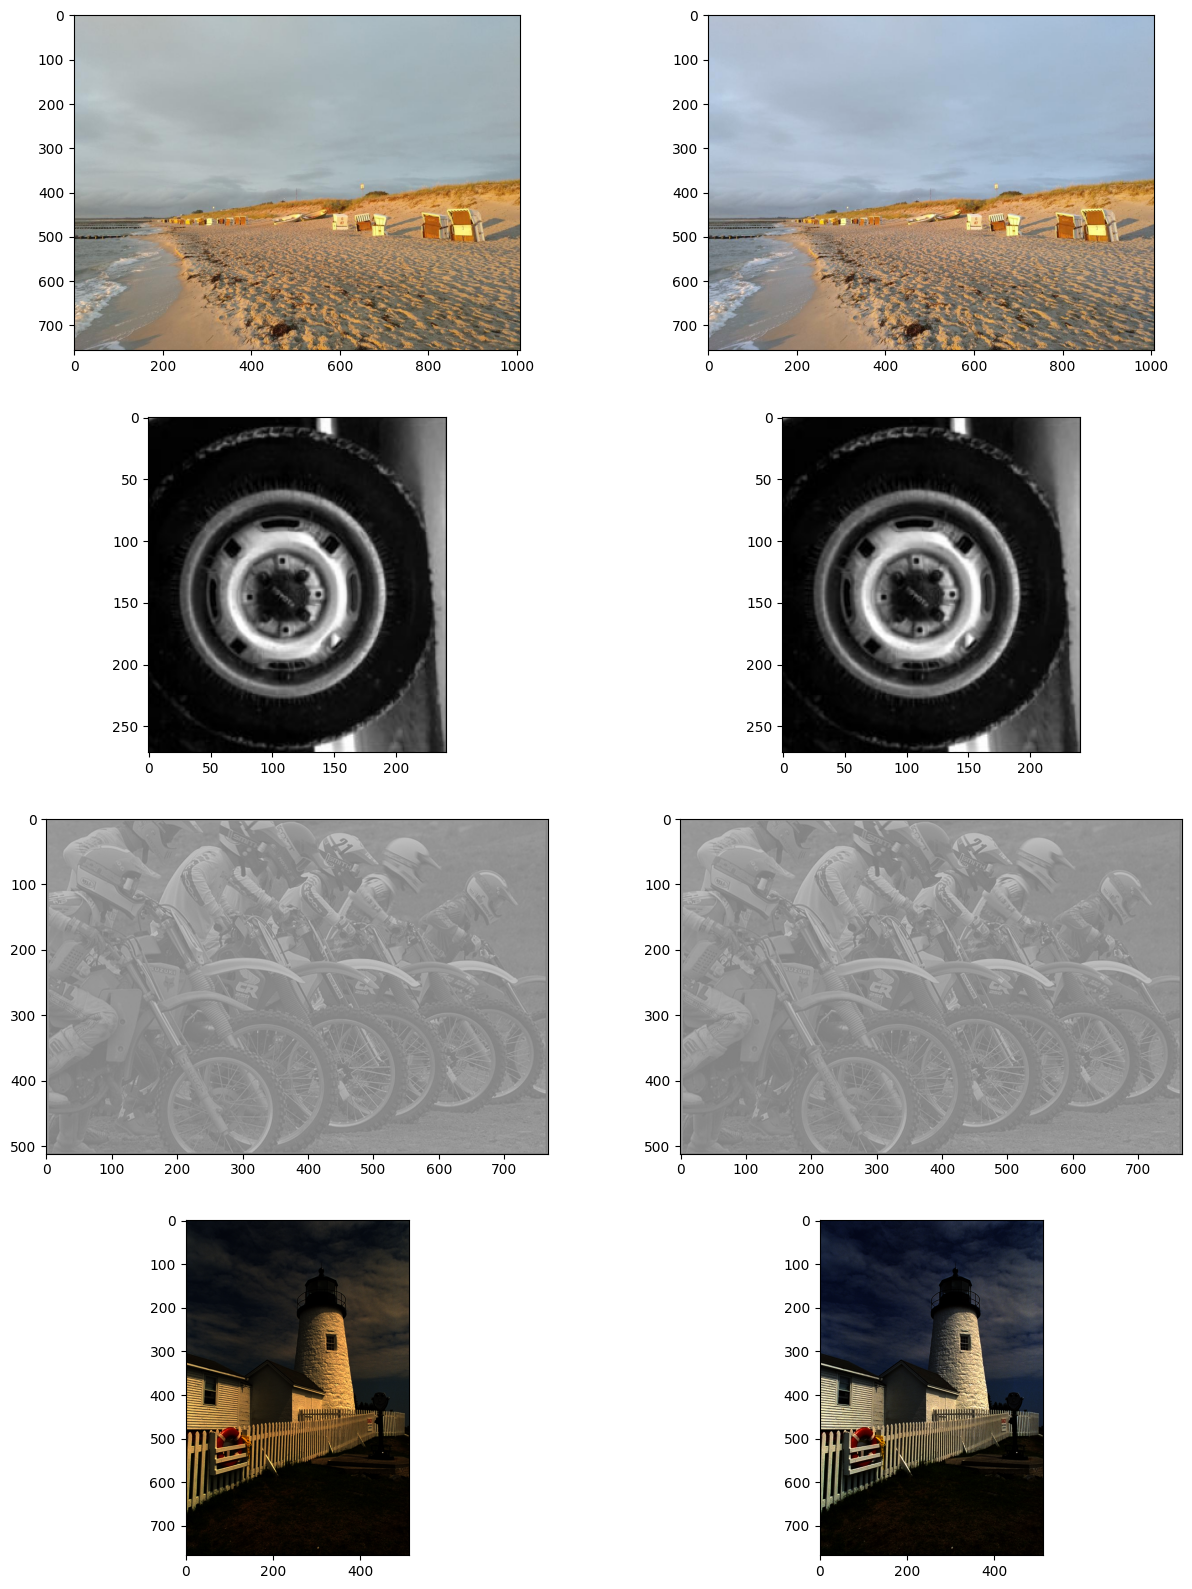

In [88]:
for i in range(len(images)):

    img = images[i]
    # Compute the mean values for all three colour channels (red, green, blue)
    red, green, blue = cv2.split(img)
    mean_r = np.mean(red)
    mean_g = np.mean(green)
    mean_b = np.mean(blue)

    # Compute the coefficients kr, kg, kb
    # Note: there are 3 coefficients to compute but we only have 2 equations.
    # Therefore, you have to make an assumption, fix the value of one of the
    # coefficients and compute the remining two
    # Hint: You can fix the coefficient of the brightest colour channel to 1.
    max_mean = max(mean_r, mean_g, mean_b)
    kr = max_mean / mean_r
    kg = max_mean / mean_g
    kb = max_mean / mean_b

    # Apply color balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    balanced[..., 0] = red * kr
    balanced[..., 1] = green * kg
    balanced[..., 2] = blue * kb
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    # Show the original and the balanced image side by side
    plt.subplot(len(images)*100+20+i*2+1), plt.imshow(images[i])
    plt.subplot(len(images)*100+20+i*2+2), plt.imshow(balanced)


### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

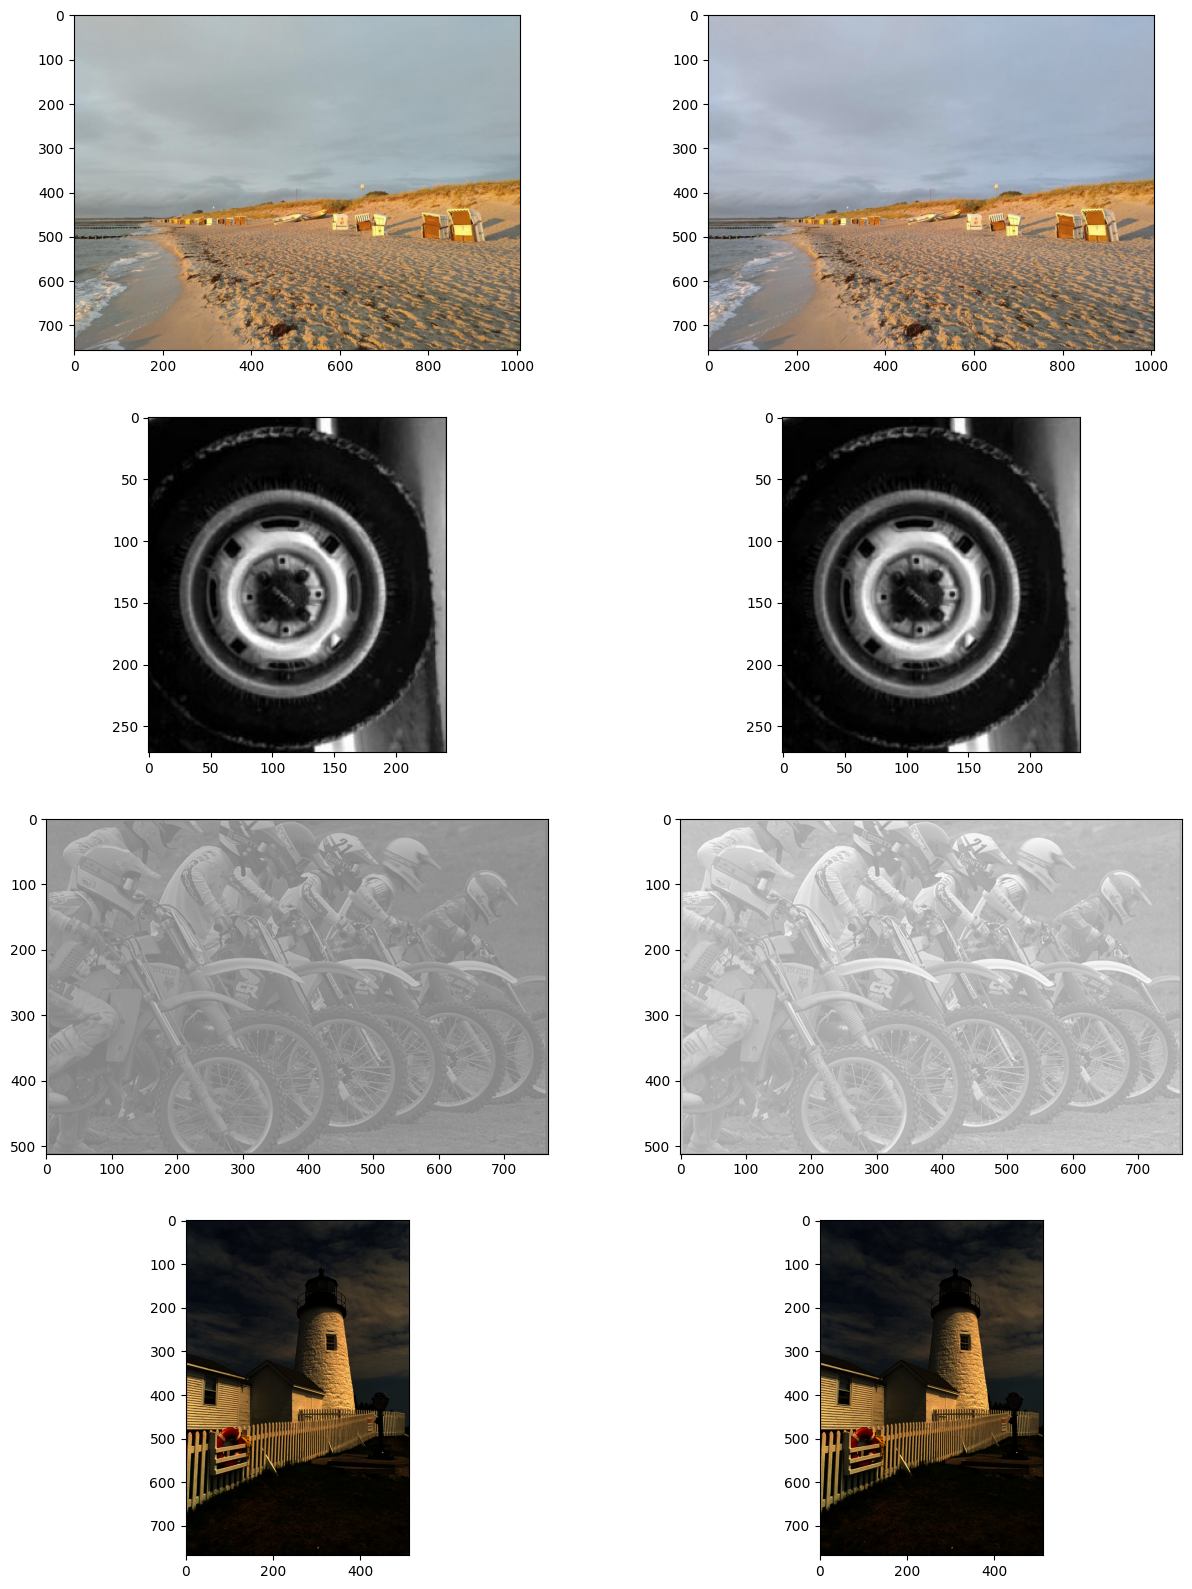

In [89]:
for i in range(len(images)):

    img = images[i]

    # Compute the maximum values for all three colour channels (red, green, blue)
    red, green, blue = cv2.split(img)


    max_r = np.max(red)
    max_g = np.max(green)
    max_b = np.max(blue)

    # Apply scale-by-max balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    balanced[..., 0] = np.floor(red.astype(np.float32) *255 / max_r)
    balanced[..., 1] = np.floor(green.astype(np.float32) * 255 / max_g)
    balanced[..., 2] = np.floor(blue.astype(np.float32) * 255/ max_b)
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    plt.subplot(len(images)*100+20+i*2+1), plt.imshow(images[i])
    plt.subplot(len(images)*100+20+i*2+2), plt.imshow(balanced)